In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

# Prompt: “should travelers avoid flying airlines that have had crashes in the past”?

#### We formulate the hypotheses as such:
#### H0: There's no positive relationship in airline crash rates between 1985-1999 and 2000-2014
#### H1: There is a positive relationship in airline crash rates between 1985-1999 and 2000-2014

# EDA

In [2]:
master_df = pd.read_csv('airline-safety.csv')
master_df.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [3]:
master_df.shape

(56, 8)

In [4]:
#add regional_subsidiary column by parsing airline
master_df.loc[master_df['airline'].str.contains(r".*[*].*"), 'regional_subsidiary'] = 1
master_df["regional_subsidiary"] = master_df["regional_subsidiary"].fillna(0)
master_df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,regional_subsidiary
0,Aer Lingus,320906734,2,0,0,0,0,0,0.0
1,Aeroflot*,1197672318,76,14,128,6,1,88,1.0
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,0.0
3,Aeromexico*,596871813,3,1,64,5,0,0,1.0
4,Air Canada,1865253802,2,0,0,2,0,0,0.0


<Axes: >

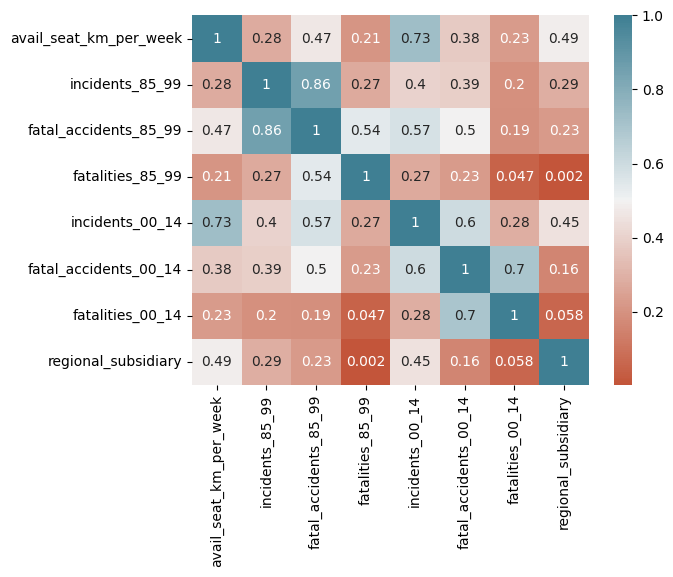

In [5]:
CorrMatrix = master_df.drop(['airline'], axis=1).corr()
sns.heatmap(CorrMatrix, annot=True, cmap=sns.diverging_palette(20, 220, n=200))

#### For the purpose of this assessment, we actually don't care for the rate of fatal accidents or fatalities, since I assume people would want to avoid plane crashes regardless of its fatality rate.

#### We also don't care to compare the total number of accidents; rather, we care more about the accident rate, which is the total number of accidents per km.
#### But there is a problem. There is no total km, only avail_seat_km_per_week.
#### The best solution we have with this dataset is to calculate a rate of incidents by dividing incidents per airline by 1B ASK.

In [6]:
#add columns for incidents per 1 billion ASK
master_df['incidents_85_99_per_1b_ask'] = master_df.incidents_85_99 / master_df.avail_seat_km_per_week * 1000000000
master_df['incidents_00_14_per_1b_ask'] = master_df.incidents_00_14 / master_df.avail_seat_km_per_week * 1000000000

In [7]:
master_df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,regional_subsidiary,incidents_85_99_per_1b_ask,incidents_00_14_per_1b_ask
0,Aer Lingus,320906734,2,0,0,0,0,0,0.0,6.232340,0.000000
1,Aeroflot*,1197672318,76,14,128,6,1,88,1.0,63.456422,5.009718
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,0.0,15.551952,2.591992
3,Aeromexico*,596871813,3,1,64,5,0,0,1.0,5.026205,8.377008
4,Air Canada,1865253802,2,0,0,2,0,0,0.0,1.072240,1.072240
5,Air France,3004002661,14,4,79,6,2,337,0.0,4.660449,1.997335
6,Air India*,869253552,2,1,329,4,1,158,1.0,2.300825,4.601649
7,Air New Zealand*,710174817,3,0,0,5,1,7,1.0,4.224312,7.040520
8,Alaska Airlines*,965346773,5,0,0,5,1,88,1.0,5.179486,5.179486
9,Alitalia,698012498,7,2,50,4,0,0,0.0,10.028474,5.730556


In [8]:
master_df = master_df.drop(['fatal_accidents_85_99', 'fatalities_85_99', 'fatal_accidents_00_14', 'fatalities_00_14'], axis=1)

<Axes: >

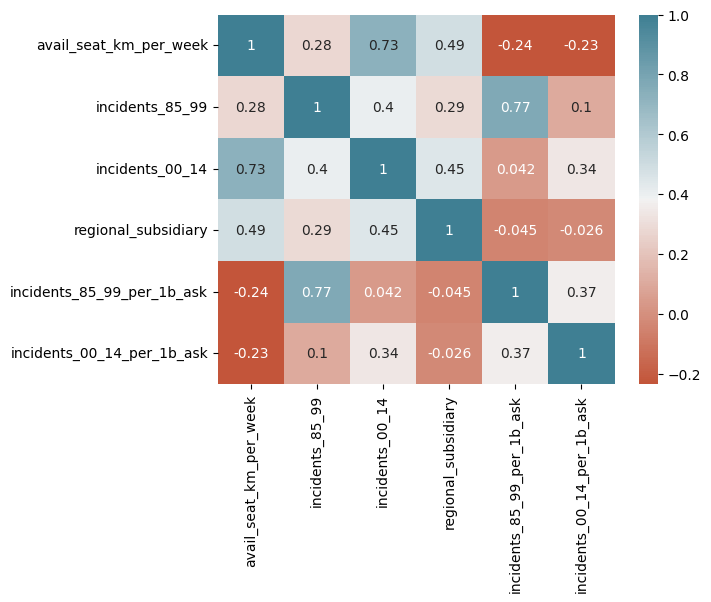

In [9]:
CorrMatrix = master_df.drop(['airline'], axis=1).corr()
sns.heatmap(CorrMatrix, annot=True, cmap=sns.diverging_palette(20, 220, n=200))

#### These are the only features we really care about. The corrleations between an airline having regional_subsidiaries and incidents are near 0. There is a small correlation between 85_99_incidents and 00_14_incidents

## Correlation between avail_seat_km_per_week and incidents

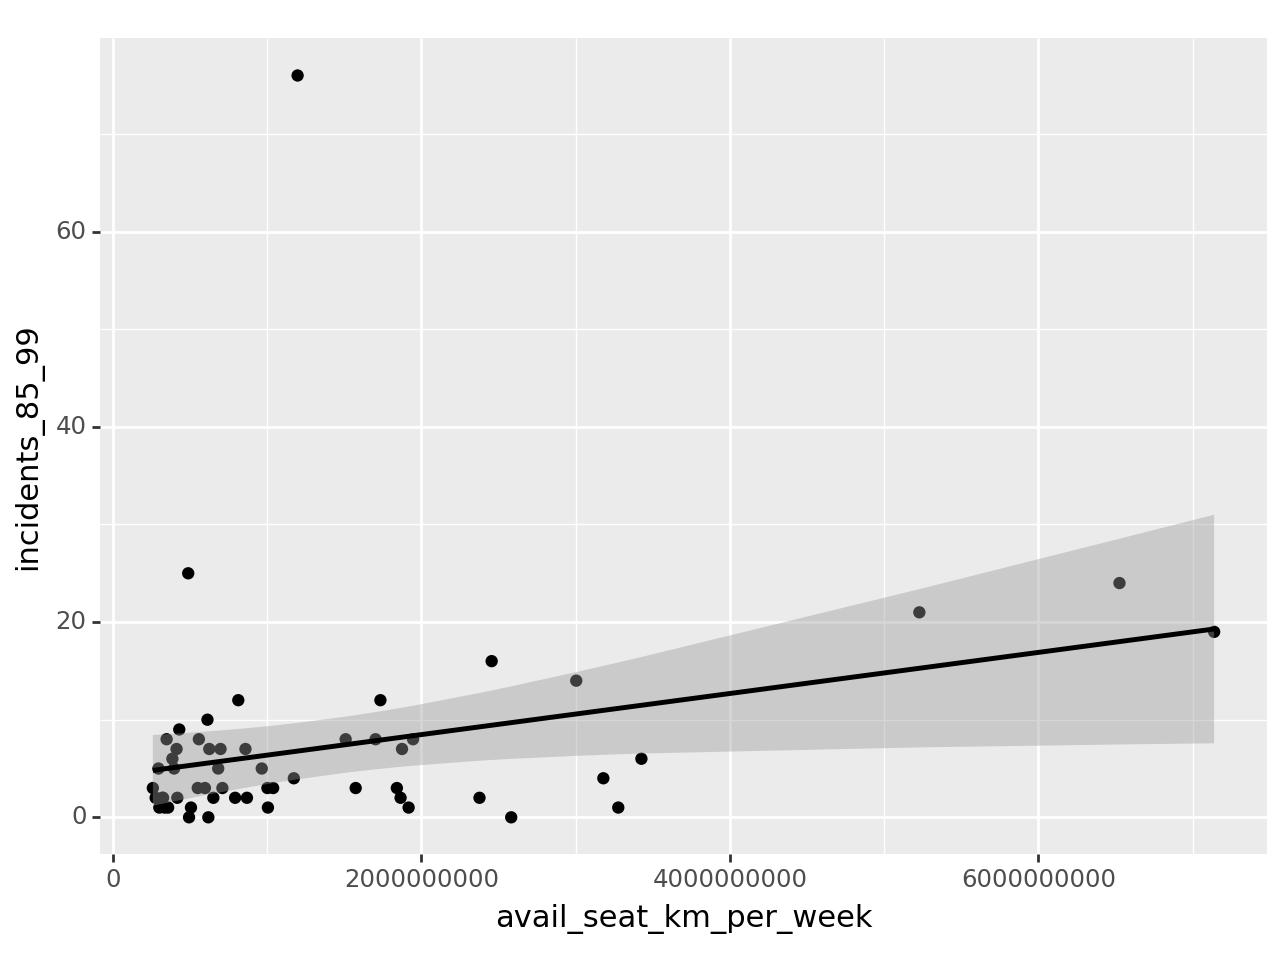

<Figure Size: (640 x 480)>

In [10]:
ggplot(master_df, aes(x='avail_seat_km_per_week', y='incidents_85_99'))+ geom_point() + stat_smooth(method="lm")

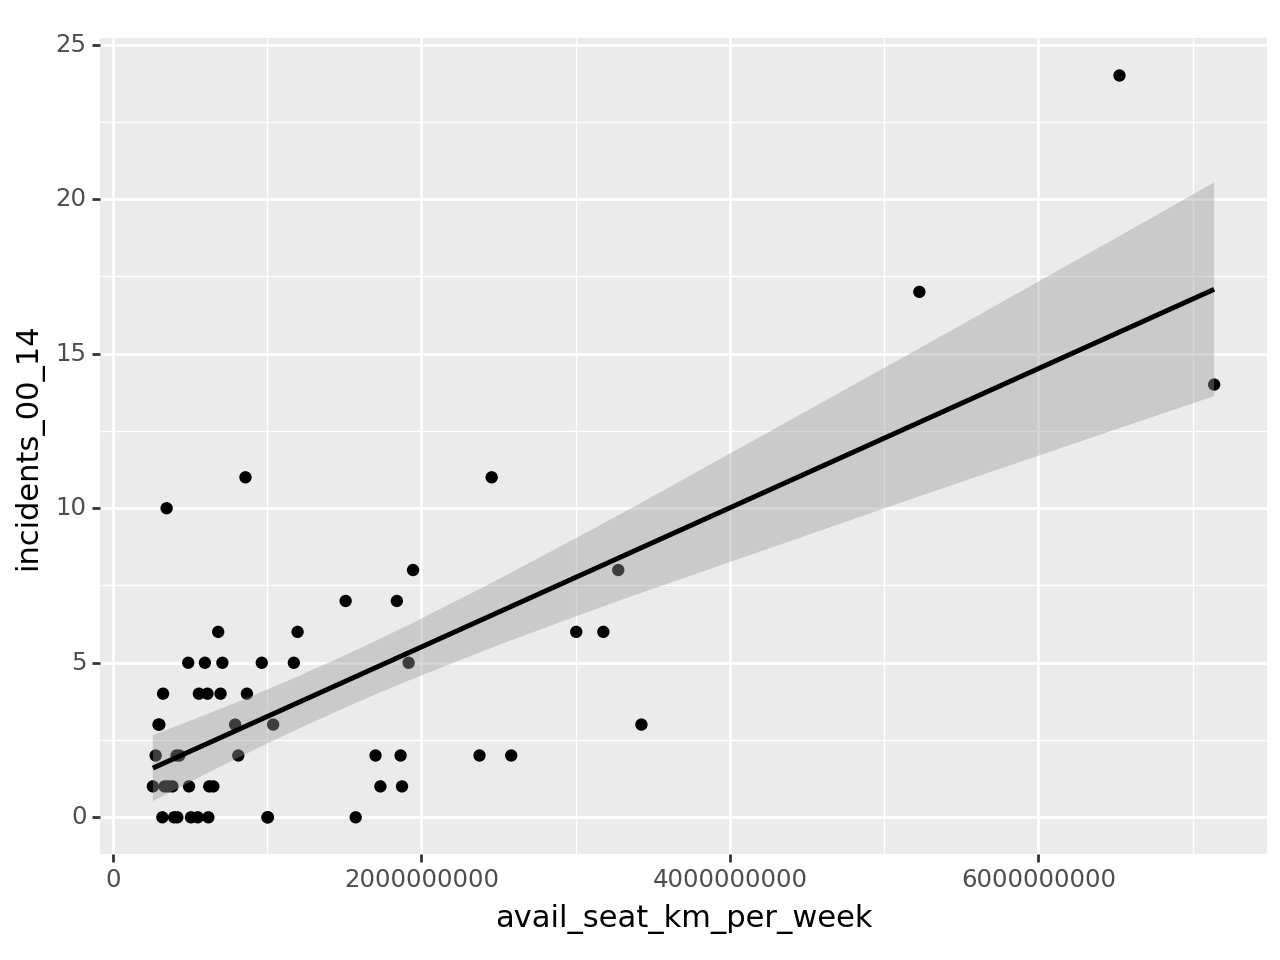

<Figure Size: (640 x 480)>

In [11]:
ggplot(master_df, aes(x='avail_seat_km_per_week', y='incidents_00_14', ))+ geom_point() + stat_smooth(method="lm")

#### This is understandable, since later versions of planes likely have more seats than earlier versions of planes. But because of this, the crash incident rate is different.

## Correlation between incidents_85_99 and incidents_00_14

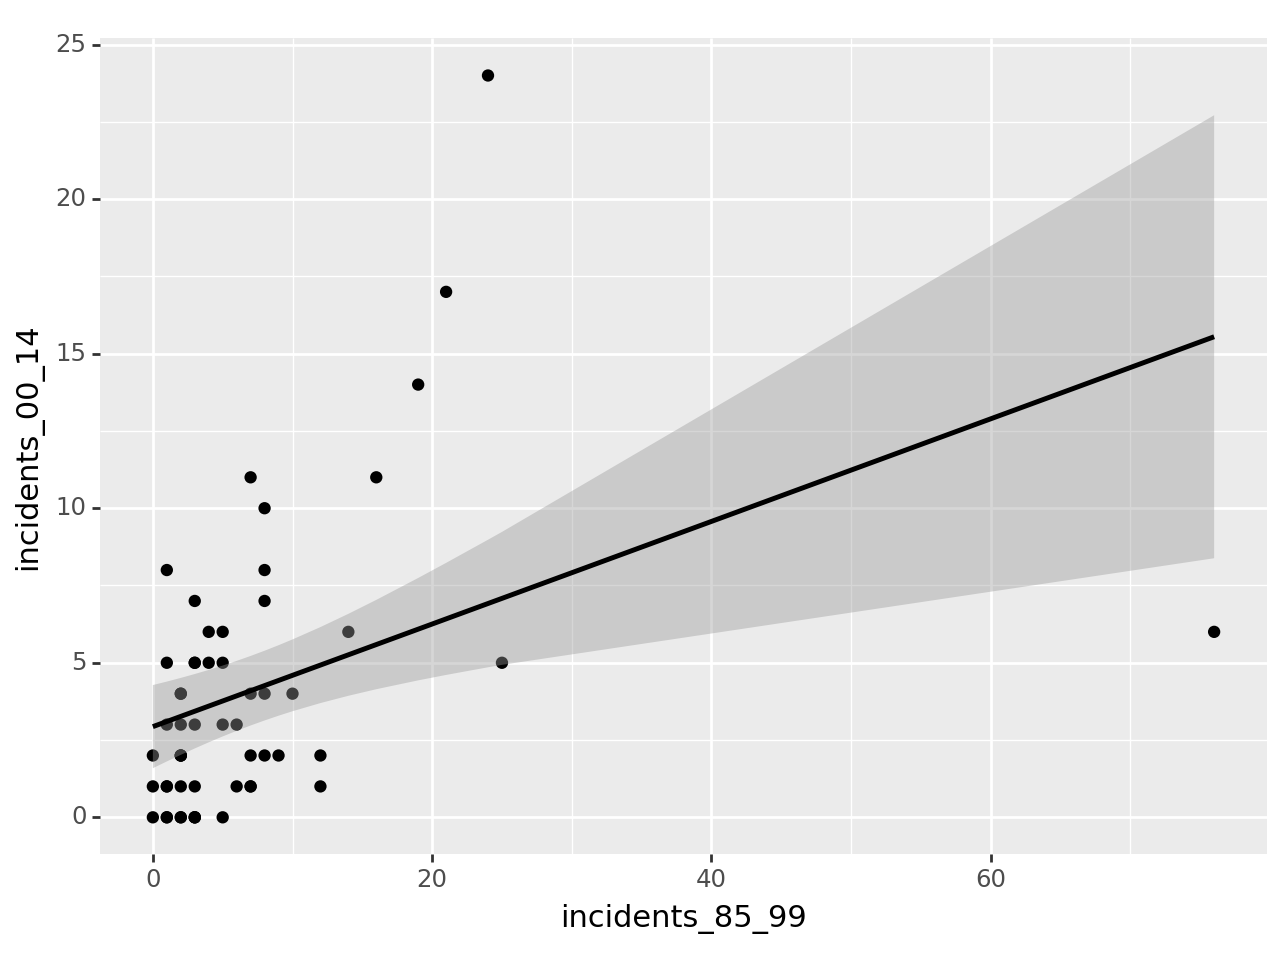

<Figure Size: (640 x 480)>

In [12]:
ggplot(master_df, aes(x='incidents_85_99', y='incidents_00_14'))+ geom_point() + stat_smooth(method="lm")

#### This is only comparing the raw sums of crashes, not the crash rates. We should compare rates instead, since that's what our hypotheses asks for. The closest we can get to crash rates in this dataset is incidents_85_99_per_1b_ask and incidents_00_14_per_1b_ask, as they divide the number of incidents by ASK. Ideally, it may be a better metric to divide the number of incidents by number of flights (takeoff, cruise, landing == 1 flight), since crashes rarely happen during the cruise phase, and the number of seats on a plane doesn't really affect a plane's crash rate.

## Correlation between incidents_85_99_per_1b_ask and incidents_00_14_per_1b_ask

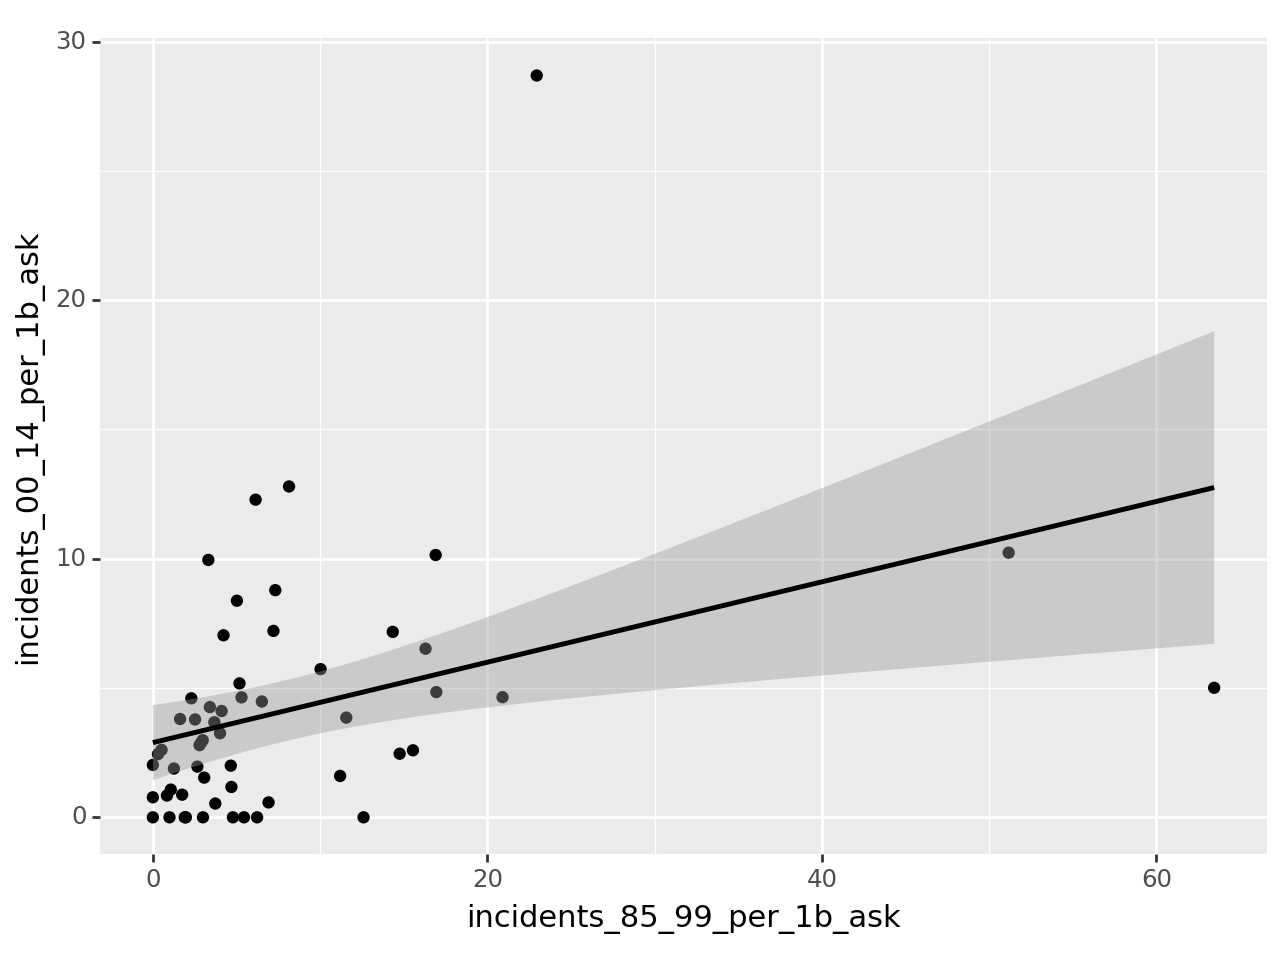

<Figure Size: (640 x 480)>

In [13]:
ggplot(master_df, aes(x='incidents_85_99_per_1b_ask', y='incidents_00_14_per_1b_ask'))+ geom_point() + stat_smooth(method="lm")

#### there are a couple of ouliers here that may be disproportionately affecting our dataset. Let's take a look at them to see what we can do.

### LR without outliers

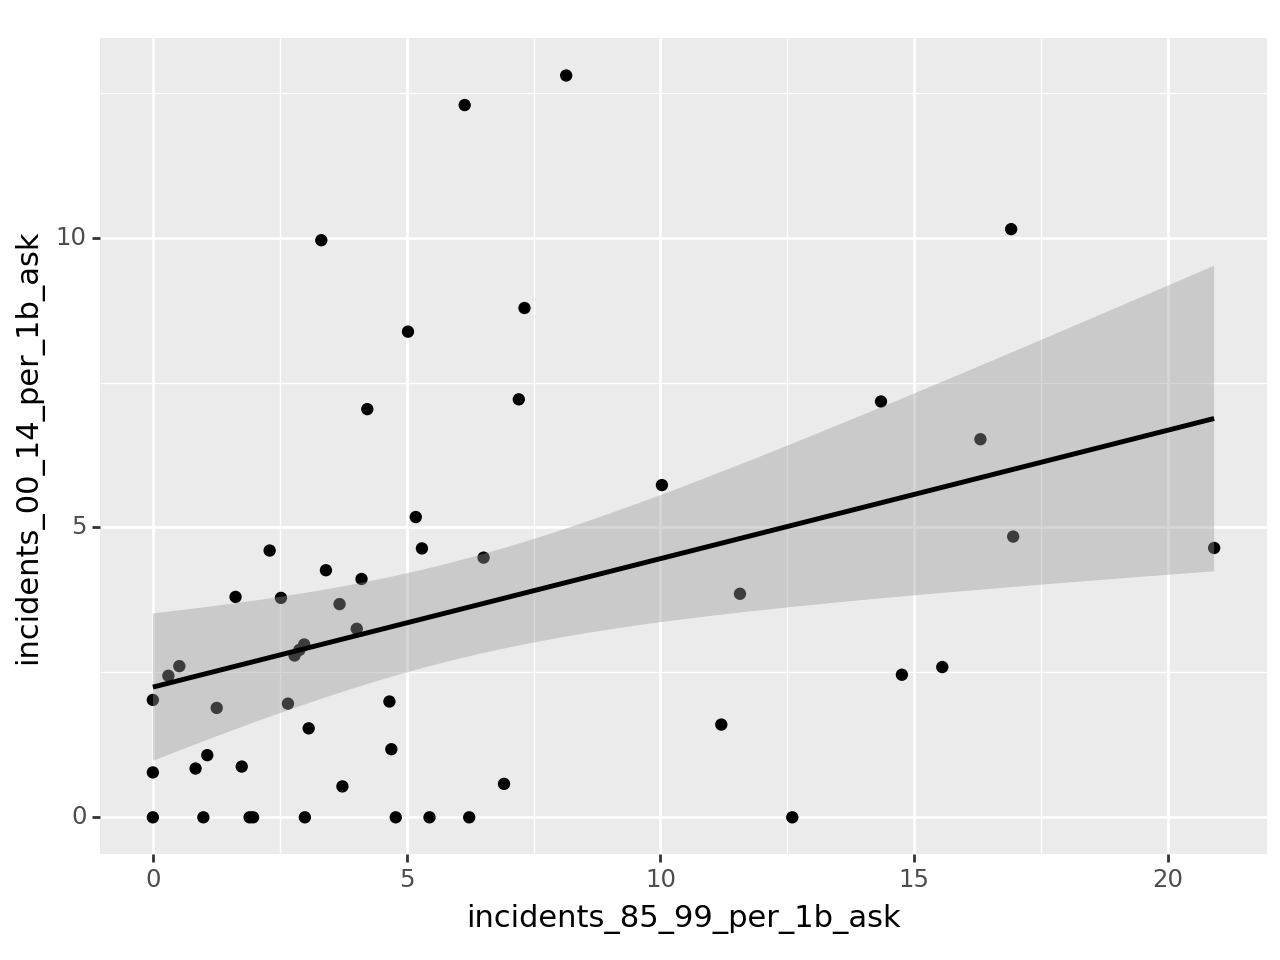

<Figure Size: (640 x 480)>

In [14]:
master_df_no_outliers = master_df[master_df['airline'].str.contains('Aeroflot*|Ethiopian Airlines|Pakistan International') == False]
ggplot(master_df_no_outliers, aes(x='incidents_85_99_per_1b_ask', y='incidents_00_14_per_1b_ask'))+ geom_point() + stat_smooth(method="lm")

#### The data here is not homoscedastic. As such, it is inappropriate to apply a linear regression model for meaningful results. Perhaps we can treat the data to be more homoscedastic?

C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
C:\Users\Mark\AppData\Local\Temp\ipykernel_16548\333996818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
C:\Users\Mark\AppData\Local\Temp\ipykernel_16548\333996818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

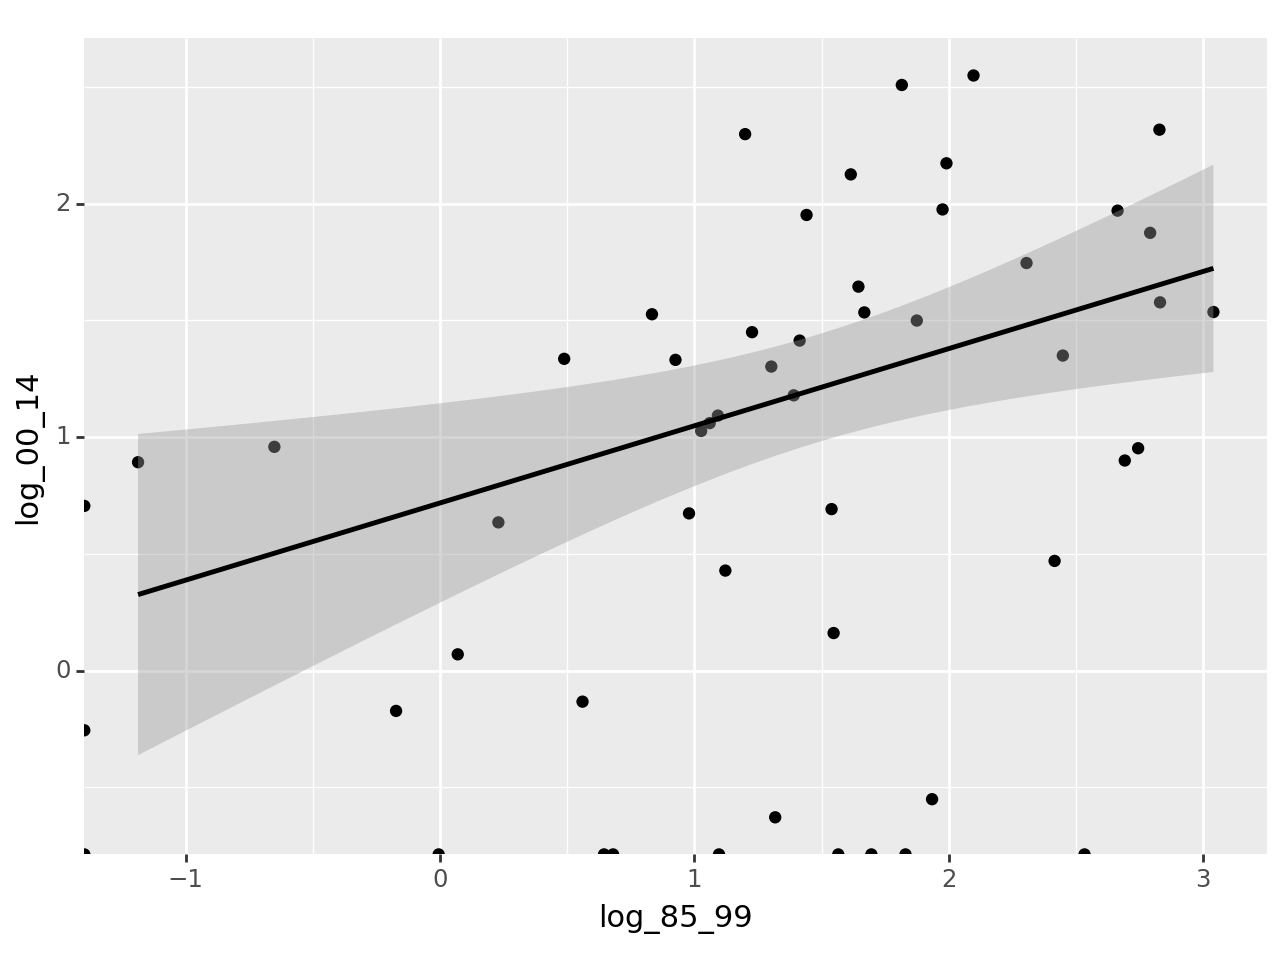

<Figure Size: (640 x 480)>

In [15]:
#logging the values
master_df_no_outliers['log_85_99'] = np.log(master_df_no_outliers.incidents_85_99_per_1b_ask)
master_df_no_outliers['log_00_14'] = np.log(master_df_no_outliers.incidents_00_14_per_1b_ask)
ggplot(master_df_no_outliers, aes(x='log_85_99', y='log_00_14'))+ geom_point() + stat_smooth(method="lm")

C:\Users\Mark\AppData\Local\Temp\ipykernel_16548\3268979204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Mark\AppData\Local\Temp\ipykernel_16548\3268979204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


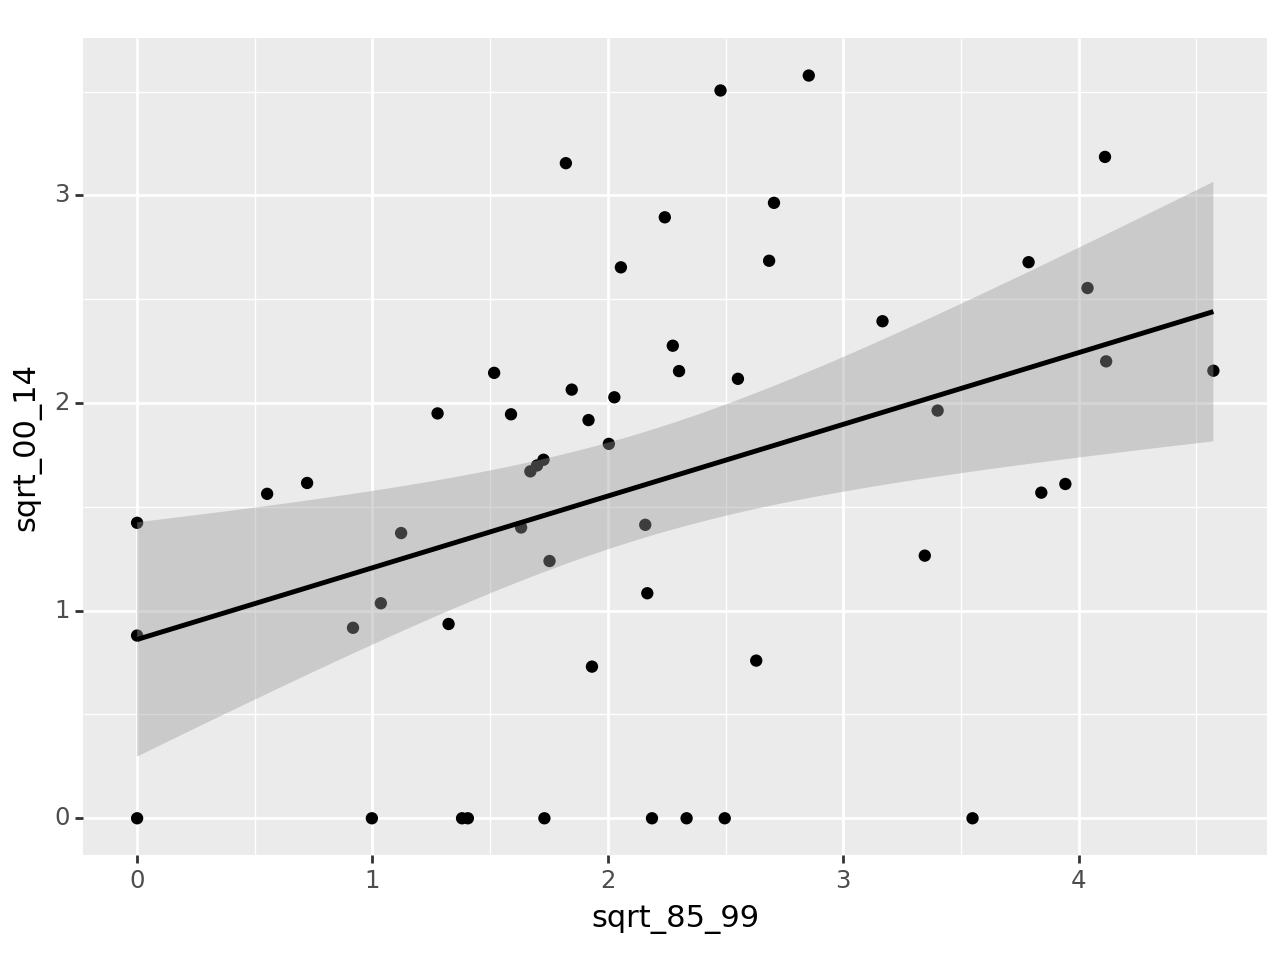

<Figure Size: (640 x 480)>

In [16]:
#sqrt the values
master_df_no_outliers['sqrt_85_99'] = np.sqrt(master_df_no_outliers.incidents_85_99_per_1b_ask)
master_df_no_outliers['sqrt_00_14'] = np.sqrt(master_df_no_outliers.incidents_00_14_per_1b_ask)
ggplot(master_df_no_outliers, aes(x='sqrt_85_99', y='sqrt_00_14'), )+ geom_point() + stat_smooth(method="lm")

#### Attempts to treat data for heteroscedacity seems not to treat low r-square values. This means that attempts at a linear regression will very poorly explain the relationship.

# Regression Results

In [17]:
import statsmodels.api as sm

#define predictor and response variables
y = master_df['incidents_00_14_per_1b_ask']
x = master_df['incidents_00_14_per_1b_ask']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     incidents_00_14_per_1b_ask   R-squared:                       1.000
Model:                                    OLS   Adj. R-squared:                  1.000
Method:                         Least Squares   F-statistic:                 2.438e+32
Date:                        Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                                14:01:19   Log-Likelihood:                 1810.9
No. Observations:                          56   AIC:                            -3618.
Df Residuals:                              54   BIC:                            -3614.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [19]:
import statsmodels.api as sm

#define predictor and response variables
y = master_df_no_outliers['sqrt_85_99']
x = master_df_no_outliers['sqrt_00_14']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sqrt_85_99   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.704
Date:                Fri, 19 May 2023   Prob (F-statistic):            0.00479
Time:                        14:01:33   Log-Likelihood:                -75.256
No. Observations:                  53   AIC:                             154.5
Df Residuals:                      51   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4673      0.269      5.463      0.0

### A p-value of 0.00510 for this model indicates that there is a linear relationship between the 2 variables. However, the R-squared value being a very low 0.136 means that this model explains a very little amount of the variation in the dependent variable. With the R-squared value being so poor, there is a lack of confidence to extrapolate the findings the larger, actual population.

# Conclusion

#### Thus, the current conclusion is that there is insufficient evidence to form a meaningful relationship between the incidents in 85-99 and 00-14.
#### We hence cannot reject H0; i.e. we cannot find significant evidence to reject the notion that there's no positive relationship in airline crash rates between 1985-1999 and 2000-2014.
#### Additionally, the numbers of incidents per 1B ASK are very very low, meaning airline incidents are extremely rare. From a practical perspective, even if there were to be a positive correlation between airline incidents in 85-99 and 00-14, it is still very safe to use such airlines, except for the outliers (Aeroflot, Ethiopian Airlines, Pakistan International)
#### So in plain English: We don't have enough evidence to suggest travelers avoid flying airlines that have had crashes in the past, except for Aeroflot, Ethiopian Airlines, Pakistan International